In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.6 MB/s 
     |████████████████████████████████| 1.2 MB 16.3 MB/s 
     |████████████████████████████████| 189 kB 31.7 MB/s 
     |████████████████████████████████| 48 kB 2.9 MB/s 
     |████████████████████████████████| 55 kB 1.6 MB/s 
     |████████████████████████████████| 51 kB 105 kB/s 
     |████████████████████████████████| 561 kB 40.1 MB/s 
     |████████████████████████████████| 130 kB 22.5 MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.all import *

In [ ]:
import fastai

In [ ]:
!pip show pytorch

In [ ]:
!pip show torch

Name: torch
Version: 1.10.0+cu111
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.7/dist-packages
Requires: typing-extensions
Required-by: torchvision, torchtext, torchaudio, fastai


In [ ]:
!python --version

Python 3.7.12


In [ ]:
#hide
path = Path('/content/gdrive/MyDrive/Colab Notebooks/FallGuys')

In [ ]:
path.ls()

In [ ]:
(path/"Big Fans").ls()

In [ ]:
def get_y(r): return parent_label(r).split(' ')

In [ ]:
actions = DataBlock(blocks = (ImageBlock, MultiCategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42), # Need to try with data aug later
                 get_y=get_y)
dlsBF = actions.dataloaders(path/"Big Fans")

# Original single-cat:
# actions = DataBlock(blocks = (ImageBlock, CategoryBlock), 
#                  get_items=get_image_files, 
#                  splitter=RandomSplitter(seed=42), # Need to try with data aug later
#                  get_y=parent_label)
# dlsBF = actions.dataloaders(path/"Big Fans")

In [ ]:
dlsBF.train.vocab

['Dive', 'Down', 'Jump', 'Left', 'Nothing', 'Right', 'Up']

### Checking and Debugging a DataBlock

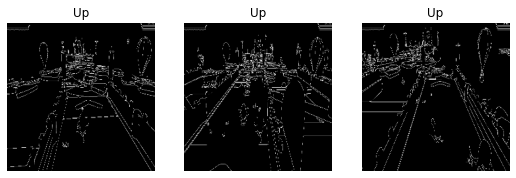

In [ ]:
dlsBF.show_batch(nrows=1, ncols=3)

In [ ]:
dsets = actions.datasets(path/"Big Fans")
dsets.train[0] # Left Right Down Up Jump Dive Nothing (not in that order)

(PILImage mode=RGB size=224x224,
 TensorMultiCategory([0., 0., 0., 0., 0., 1., 1.]))

In [ ]:
learn = cnn_learner(dlsBF, resnet18)

In [ ]:
x,y = dlsBF.train.one_batch()
learn.cuda()

In [ ]:
activs = learn.model(x)
activs.shape

torch.Size([64, 7])

In [ ]:
activs[0] # pretrained model with random activations

TensorBase([-1.2861, -1.3594,  0.1660, -2.4108,  1.5459, -3.7574, -1.7529], device='cuda:0', grad_fn=<AliasBackward0>)

### Initial Training

SuggestedLRs(valley=0.001737800776027143)

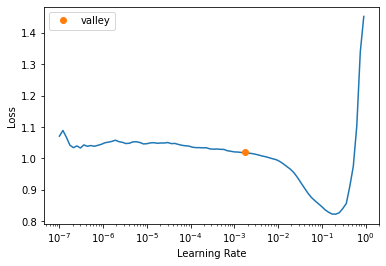

In [ ]:
# learn = cnn_learner(dlsBF, resnet34, metrics=error_rate)
learn = load_learner(Path(path/'General.pkl'))
learn.save('General')
learnTest = cnn_learner(dlsBF, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
# learnTest.load('General')
learnTest.lr_find()

In [ ]:
learn =  cnn_learner(dlsBF, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(1, base_lr=3e-2) # no loss function in learner. Fastai picks default loss. Which is cross entropy loss for classification

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.237132,0.214494,0.867229,43:31


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.180695,0.162105,0.915562,02:49


In [ ]:
learn.export(Path(path/'GeneralMulti.pkl'))

In [ ]:
learn = load_learner(Path(path/'GeneralMulti.pkl'))
learn.save('BF')

Path('models/BF.pth')

In [ ]:
dlsDH = actions.dataloaders(path/"Dizzy Heights")
learnDH = cnn_learner(dlsDH, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnDH.load('BF')
learnDH.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.202095,0.181770,0.908628,15:53


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.159322,0.152877,0.918085,00:53


In [ ]:
+
learnDH.save('DH')
learnDH.export(Path(path/'GeneralMulti.pkl'))
dlsDD = actions.dataloaders(path/"Door Dash")
learnDD = cnn_learner(dlsDD, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnDD.load('DH')
learnDD.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.141654,0.127855,0.952160,25:23


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.113180,0.094413,0.953263,00:59


In [ ]:
learnDD.save('DD')
learnDD.export(Path(path/'GeneralMulti.pkl'))
dlsFT = actions.dataloaders(path/"Full Tilt")
learnFT = cnn_learner(dlsFT, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnFT.load('DD')
learnFT.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.253516,0.240582,0.850795,2:15:28


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.183799,0.178864,0.905717,05:11


In [ ]:
learnFT.save('FT')
learnFT.export(Path(path/'GeneralMulti.pkl'))
dlsGC = actions.dataloaders(path/"Gate Crash")
learnGC = cnn_learner(dlsGC, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnGC.load('FT')
learnGC.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.185390,0.175770,0.919522,07:17


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.140779,0.115157,0.941303,00:43


In [ ]:
learnGC.save('GC')
learnGC.export(Path(path/'GeneralMulti.pkl'))
dlsHP = actions.dataloaders(path/"Hit Parade")
learnHP = cnn_learner(dlsHP, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnHP.load('GC')
learnHP.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.137949,0.372383,0.918403,45:09


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.113893,0.115671,0.943175,01:44


In [ ]:
learnHP.save('HP')
learnHP.export(Path(path/'GeneralMulti.pkl'))
dlsKF = actions.dataloaders(path/"Knight Fever")
learnKF = cnn_learner(dlsKF, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnKF.load('HP')
learnKF.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.197650,0.575782,0.912470,32:03


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.160910,0.159101,0.927155,01:15


In [ ]:
learnKF.save('KF')
learnKF.export(Path(path/'GeneralMulti.pkl'))
dlsLL = actions.dataloaders(path/"Lily Leapers")
learnLL = cnn_learner(dlsLL, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnLL.load('KF')
learnLL.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.298567,0.328193,0.820821,29:59


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.252576,0.244707,0.852516,01:15


In [ ]:
learnLL.save('LL')
learnLL.export(Path(path/'GeneralMulti.pkl'))
dlsPP = actions.dataloaders(path/"Party Promenade")
learnPP = cnn_learner(dlsPP, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnPP.load('LL')
learnPP.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.259399,0.266789,0.874397,1:36:41


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.190204,0.190625,0.896036,03:48


In [ ]:
learnPP.save('PP')
learnPP.export(Path(path/'GeneralMulti.pkl'))
dlsRO = actions.dataloaders(path/"Roll On")
learnRO = cnn_learner(dlsRO, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnRO.load('PP')
learnRO.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.247212,0.296616,0.891022,37:23


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.203397,0.181922,0.894891,01:28


In [ ]:
learnRO.save('RO')
learnRO.export(Path(path/'GeneralMulti.pkl'))
dlsSS = actions.dataloaders(path/"See Saw")
learnSS = cnn_learner(dlsSS, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnSS.load('RO')
learnSS.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.207290,0.221915,0.882422,1:19:49


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.145421,0.129835,0.936321,03:01


In [ ]:
learnSS.save('SS')
learnSS.export(Path(path/'GeneralMulti.pkl'))
dlsSSt = actions.dataloaders(path/"Skyline Stumble")
learnSSt = cnn_learner(dlsSSt, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnSSt.load('SS')
learnSSt.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.300489,0.284712,0.795200,35:38


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.248300,0.225845,0.872725,01:19


In [ ]:
learnSSt = load_learner(Path(path/'GeneralMulti.pkl'))

In [ ]:
learnSSt.save('SSt')
# learnSSt.export(Path(path/'GeneralMulti.pkl'))
dlsTW = actions.dataloaders(path/"The Whirlygig")
learnTW = cnn_learner(dlsTW, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnTW.load('SSt')
learnTW.fine_tune(1, base_lr=3e-2)

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.163258,0.158165,0.915442,36:27


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.124653,0.122316,0.933350,01:26


In [ ]:
learnTW.save('TW')
learnTW.export(Path(path/'GeneralMulti.pkl'))
dlsTT = actions.dataloaders(path/"Treetop Tumble")
learnTT = cnn_learner(dlsTT, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnTT.load('TW')
learnTT.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.194124,0.295042,0.901852,40:02


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.154155,0.148303,0.920369,01:35


In [ ]:
learnTT.save('TT')
learnTT.export(Path(path/'GeneralMulti.pkl'))
dlsTR = actions.dataloaders(path/"Dizzy Heights")
learnTR = cnn_learner(dlsTR, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnTR.load('TT')
learnTR.fine_tune(1, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.167042,0.187171,0.936919,22:52


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.136750,0.277684,0.937248,00:53


In [ ]:
learnTR.export(Path(path/'GeneralMulti.pkl'))

### Fine Tuning the General Model

In [ ]:
learn = load_learner(Path(path/'GeneralMulti.pkl'))

SuggestedLRs(valley=0.004365158267319202)

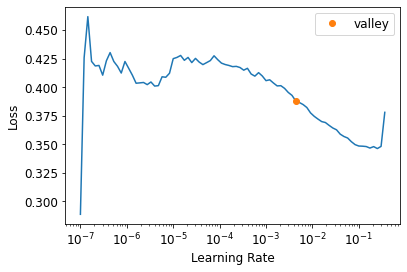

In [ ]:
# learn.unfreeze()
# learn.save('General')
# dlsBF = actions.dataloaders(path/"Big Fans")
# learnBF = cnn_learner(dlsBF, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
# learnBF.load('General')
# learnBF.lr_find()

In [ ]:
learn.unfreeze()
learn.save('General')
dlsBF = actions.dataloaders(path/"Big Fans")
learnBF = cnn_learner(dlsBF, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnBF.load('General')

In [ ]:
learnBF.unfreeze()
learnBF.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.238417,166.917877,0.821422,04:43
1,0.189023,0.179919,0.902694,02:50


In [ ]:
learnBF.save('BF')
learnBF.unfreeze()
dlsDH = actions.dataloaders(path/"Dizzy Heights")
learnDH = cnn_learner(dlsDH, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnDH.load('BF')
learnDH.unfreeze()
learnDH.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.159497,0.859989,0.914384,00:53
1,0.126259,0.119409,0.935932,00:53


In [ ]:
learnDH.save('DH')
learnDH.export(Path(path/'GeneralMulti.pkl'))
dlsDD = actions.dataloaders(path/"Door Dash")
learnDD = cnn_learner(dlsDD, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnDD.load('DH')
learnDD.unfreeze()
learnDD.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.130839,2.363282,0.925632,24:55
1,0.098248,0.087118,0.955173,00:59


In [ ]:
learnDD = load_learner(Path(path/'GeneralMulti.pkl'))

In [ ]:
learnDD.save('DD')
# learnDD.export(Path(path/'GeneralMulti.pkl'))
dlsFT = actions.dataloaders(path/"Full Tilt")
learnFT = cnn_learner(dlsFT, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnFT.load('DD')
learnFT.unfreeze()
learnFT.fit_one_cycle(2, lr_max=1e-2)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.252910,1.555241,0.835247,2:00:18
1,0.192653,0.184030,0.897552,05:11


In [ ]:
learnFT.save('FT')
learnFT.export(Path(path/'GeneralMulti.pkl'))
dlsGC = actions.dataloaders(path/"Gate Crash")
learnGC = cnn_learner(dlsGC, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnGC.load('FT')
learnGC.unfreeze()
learnGC.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.155353,1.388179,0.860313,18:37
1,0.102483,0.087979,0.955824,00:43


In [ ]:
learnGC.save('GC')
learnGC.export(Path(path/'GeneralMulti.pkl'))
dlsHP = actions.dataloaders(path/"Hit Parade")
learnHP = cnn_learner(dlsHP, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnHP.load('GC')
learnHP.unfreeze()
learnHP.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.122610,0.121858,0.935936,45:19
1,0.095095,0.099046,0.949452,01:44


In [ ]:
learnHP.save('HP')
learnHP.export(Path(path/'GeneralMulti.pkl'))
dlsKF = actions.dataloaders(path/"Knight Fever")
learnKF = cnn_learner(dlsKF, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnKF.load('HP')
learnKF.unfreeze()
learnKF.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.188786,0.237304,0.896398,32:27
1,0.163425,0.173365,0.927444,01:15


In [ ]:
learnKF.save('KF')
learnKF.export(Path(path/'GeneralMulti.pkl'))
dlsLL = actions.dataloaders(path/"Lily Leapers")
learnLL = cnn_learner(dlsLL, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnLL.load('KF')
learnLL.unfreeze()
learnLL.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.277948,0.287205,0.831752,31:14
1,0.224830,0.242572,0.867901,01:15


In [ ]:
learnLL.save('LL')
learnLL.export(Path(path/'GeneralMulti.pkl'))
dlsPP = actions.dataloaders(path/"Party Promenade")
learnPP = cnn_learner(dlsPP, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnPP.load('LL')
learnPP.unfreeze()
learnPP.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.253044,0.305683,0.853657,1:36:54
1,0.208994,0.217759,0.880314,03:47


In [ ]:
learnPP.save('PP')
learnPP.export(Path(path/'GeneralMulti.pkl'))
dlsRO = actions.dataloaders(path/"Roll On")
learnRO = cnn_learner(dlsRO, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnRO.load('PP')
learnRO.unfreeze()
learnRO.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.228944,102.139885,0.579712,36:54
1,0.183837,0.169307,0.907093,01:28


In [ ]:
learnRO.save('RO')
learnRO.export(Path(path/'GeneralMulti.pkl'))
dlsSS = actions.dataloaders(path/"See Saw")
learnSS = cnn_learner(dlsSS, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnSS.load('RO')
learnSS.unfreeze()
learnSS.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.166239,1.051910,0.907341,1:09:55
1,0.109961,0.100775,0.949778,03:02


In [ ]:
learnSS.save('SS')
learnSS.export(Path(path/'GeneralMulti.pkl'))
dlsSSt = actions.dataloaders(path/"Skyline Stumble")
learnSSt = cnn_learner(dlsSSt, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnSSt.load('SS')
learnSSt.unfreeze()
learnSSt.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.264789,0.364042,0.864742,33:50
1,0.193687,0.177589,0.897053,01:20


In [ ]:
learnSSt.save('SSt')
learnSSt.export(Path(path/'GeneralMulti.pkl'))
dlsTW = actions.dataloaders(path/"The Whirlygig")
learnTW = cnn_learner(dlsTW, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnTW.load('SSt')
learnTW.unfreeze()
learnTW.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.161872,0.241723,0.921932,36:15
1,0.110504,0.105737,0.945372,01:27


In [ ]:
learnTW = load_learner(Path(path/'GeneralMulti.pkl'))

In [ ]:
learnTW.save('TW')
# learnTW.export(Path(path/'GeneralMulti.pkl'))
dlsTT = actions.dataloaders(path/"Treetop Tumble")
learnTT = cnn_learner(dlsTT, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnTT.load('TW')
learnTT.unfreeze()
learnTT.fit_one_cycle(2, lr_max=1e-2)

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.194771,0.163903,0.903920,13:41
1,0.135721,0.128589,0.931627,01:35


In [ ]:
learnTT.save('TT')
learnTT.export(Path(path/'GeneralMulti.pkl'))
dlsTR = actions.dataloaders(path/"Dizzy Heights")
learnTR = cnn_learner(dlsTR, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnTR.load('TT')
learnTR.unfreeze()
learnTR.fit_one_cycle(2, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.151377,0.792867,0.854840,24:11
1,0.105213,0.100961,0.946542,00:53


In [ ]:
learnTR.export(Path(path/'GeneralMulti.pkl'))

### Fine Tuning the Indibidual Models

In [ ]:
learn = load_learner(Path(path/'GeneralMulti.pkl'))

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.010964781977236271)

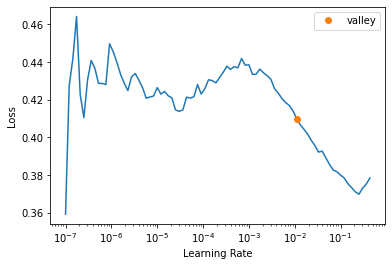

In [ ]:
learn.unfreeze()
learn.save('General')
dlsBF = actions.dataloaders(path/"Big Fans")
learnBF = cnn_learner(dlsBF, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnBF.load('General')
learnBF.lr_find()

In [ ]:
learnBF.unfreeze()
learnBF.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.195590,0.297720,0.865033,16:04
1,0.173637,0.628486,0.859211,02:51
2,0.137918,0.134450,0.937112,02:51
3,0.097643,0.143900,0.948092,02:51
4,0.071557,0.106825,0.954423,02:51


In [ ]:
learnBF.save('BF')
learnBF.export(Path(path/'BigFansMulti.pkl'))
learnBF.unfreeze()
dlsDH = actions.dataloaders(path/"Dizzy Heights")
learnDH = cnn_learner(dlsDH, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnDH.load('BF')
learnDH.unfreeze()
learnDH.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.162571,0.465431,0.914960,14:11
1,0.109855,0.103823,0.943663,00:53
2,0.109684,0.133578,0.939551,00:53
3,0.078209,0.088308,0.957645,00:53
4,0.056057,0.086130,0.958796,00:53


In [ ]:
learnDH.save('DH')
learnDH.export(Path(path/'DizzyHeightsMulti.pkl'))
dlsDD = actions.dataloaders(path/"Door Dash")
learnDD = cnn_learner(dlsDD, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnDD.load('DH')
learnDD.unfreeze()
learnDD.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.131347,0.104832,0.960611,15:53
1,0.089299,0.136342,0.943930,00:59
2,0.063560,0.064835,0.967666,00:59
3,0.038557,0.047890,0.978028,01:00
4,0.023915,0.046273,0.979938,00:59


In [ ]:
learnDD.save('DD')
learnDD.export(Path(path/'DoorDashMulti.pkl'))
dlsFT = actions.dataloaders(path/"Full Tilt")
learnFT = cnn_learner(dlsFT, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnFT.load('DD')
learnFT.unfreeze()
learnFT.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.220586,0.209188,0.893902,1:25:40
1,0.172967,0.164419,0.924915,05:12
2,0.134066,0.859581,0.932312,05:12
3,0.091681,0.098387,0.955634,05:12
4,0.061575,0.079667,0.963590,05:12


In [ ]:
learnFT.save('FT')
learnFT.export(Path(path/'FullTiltMulti.pkl'))
dlsGC = actions.dataloaders(path/"Gate Crash")
learnGC = cnn_learner(dlsGC, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnGC.load('FT')
learnGC.unfreeze()
learnGC.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.193425,0.107668,0.946825,05:13
1,0.099665,9.653444,0.879538,00:43
2,0.060883,0.103899,0.971061,00:43
3,0.032744,0.050387,0.978321,00:43
4,0.019730,0.048647,0.979241,00:43


In [ ]:
learnGC.save('GC')
learnGC.export(Path(path/'GateCrashMulti.pkl'))
dlsHP = actions.dataloaders(path/"Hit Parade")
learnHP = cnn_learner(dlsHP, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnHP.load('GC')
learnHP.unfreeze()
learnHP.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.121291,0.126400,0.953260,29:09
1,0.083285,0.125580,0.952507,01:45
2,0.064182,0.073570,0.968449,01:44
3,0.037346,0.059015,0.975060,01:45
4,0.022727,0.055785,0.977404,01:45


In [ ]:
learnHP.save('HP')
learnHP.export(Path(path/'HitParadeMulti.pkl'))
dlsKF = actions.dataloaders(path/"Knight Fever")
learnKF = cnn_learner(dlsKF, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnKF.load('HP')
learnKF.unfreeze()
learnKF.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.197624,0.146391,0.923513,20:58
1,0.121044,0.129749,0.947852,01:16
2,0.083022,0.111927,0.949934,01:16
3,0.042926,0.085363,0.970688,01:16
4,0.024259,0.092966,0.973117,01:16


In [ ]:
learnKF.save('KF')
learnKF.export(Path(path/'KnightFeverMulti.pkl'))
dlsLL = actions.dataloaders(path/"Lily Leapers")
learnLL = cnn_learner(dlsLL, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnLL.load('KF')
learnLL.unfreeze()
learnLL.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.325492,0.248917,0.847253,19:58
1,0.212196,0.454835,0.867380,01:16
2,0.160505,0.254062,0.876402,01:16
3,0.092561,0.158774,0.929208,01:16
4,0.052648,0.156077,0.933545,01:16


In [ ]:
learnLL.save('LL')
learnLL.export(Path(path/'LilyLeapersMulti.pkl'))
dlsPP = actions.dataloaders(path/"Party Promenade")
learnPP = cnn_learner(dlsPP, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnPP.load('LL')
learnPP.unfreeze()
learnPP.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.216087,0.216857,0.886710,1:02:41
1,0.176036,0.253935,0.895691,03:49
2,0.138542,0.134500,0.925795,03:48
3,0.089983,0.107083,0.946668,03:48
4,0.060479,0.115609,0.948659,03:48


In [ ]:
learnPP.save('PP')
learnPP.export(Path(path/'PartyPromenadeMulti.pkl'))
dlsRO = actions.dataloaders(path/"Roll On")
learnRO = cnn_learner(dlsRO, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnRO.load('PP')
learnRO.unfreeze()
learnRO.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.234087,0.209589,0.901885,25:00
1,0.170765,0.253732,0.882540,01:28
2,0.116432,0.262711,0.911061,01:29
3,0.074628,0.101337,0.953571,01:29
4,0.050780,0.094414,0.956300,01:29


In [ ]:
learnRO.save('RO')
learnRO.export(Path(path/'RollOnMulti.pkl'))
dlsSS = actions.dataloaders(path/"See Saw")
learnSS = cnn_learner(dlsSS, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnSS.load('RO')
learnSS.unfreeze()
learnSS.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.158951,0.372705,0.870167,51:28
1,0.123683,0.119932,0.941824,03:02
2,0.089845,0.320549,0.908831,03:02
3,0.053716,0.232721,0.932596,03:03
4,0.033191,0.053346,0.977436,03:03


In [ ]:
learnSS.save('SS')
learnSS.export(Path(path/'SeeSawMulti.pkl'))
dlsSSt = actions.dataloaders(path/"Skyline Stumble")
learnSSt = cnn_learner(dlsSSt, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnSSt.load('SS')
learnSSt.unfreeze()
learnSSt.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.320797,0.925788,0.792302,22:08
1,0.200075,9.556083,0.805587,01:20
2,0.145594,0.153331,0.917500,01:20
3,0.091800,0.127898,0.939150,01:20
4,0.058212,0.120348,0.948445,01:20


In [ ]:
learnSSt.save('SSt')
learnSSt.export(Path(path/'SkylineStumbleMulti.pkl'))
dlsTW = actions.dataloaders(path/"The Whirlygig")
learnTW = cnn_learner(dlsTW, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnTW.load('SSt')
learnTW.unfreeze()
learnTW.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.181939,0.139388,0.934910,23:56
1,0.110045,0.160235,0.945020,01:27
2,0.077800,0.486065,0.933451,01:27
3,0.043370,0.069004,0.970423,01:27
4,0.024140,0.064849,0.973189,01:27


In [ ]:
learnTW.save('TW')
learnTW.export(Path(path/'TheWhirlygigMulti.pkl'))
dlsTT = actions.dataloaders(path/"Treetop Tumble")
learnTT = cnn_learner(dlsTT, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnTT.load('TW')
learnTT.unfreeze()
learnTT.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.224802,1.051410,0.867344,25:56
1,0.139596,155.423874,0.805587,01:35
2,0.095385,0.117249,0.949915,01:35
3,0.050210,0.105787,0.961081,01:35
4,0.028719,0.081647,0.969398,01:35


In [ ]:
learnTT.save('TT')
learnTT.export(Path(path/'TreetopTumbleMulti.pkl'))
dlsTR = actions.dataloaders(path/"Tundra Run")
learnTR = cnn_learner(dlsTR, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learnTR.load('TT')
learnTR.unfreeze()
learnTR.fit_one_cycle(5, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.168782,537.505127,0.747117,25:15
1,0.115158,0.106146,0.950838,01:44
2,0.076517,0.112668,0.945871,01:44
3,0.046319,0.070451,0.971210,01:45
4,0.024634,0.067323,0.971462,01:44


In [ ]:
learnTR.export(Path(path/'TundraRunMulti.pkl'))

## Model Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=30)

[('Down', 'Dive', 294), ('Dive', 'Down', 284)]

In [ ]:
learn = load_learner(Path(path/'BigFansMulti.pkl'))

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

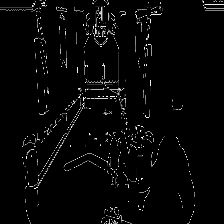

In [ ]:
img = PILImage.create(btn_upload.data[-1])
img

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn.predict(img)

In [ ]:
lbl_pred = widgets.Label()
# lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
pred, probs

((#2) ['Jump','Up'],
 TensorBase([1.6823e-01, 1.2851e-06, 9.3227e-01, 1.6699e-02, 2.6355e-05, 7.0786e-02, 9.9976e-01]))